<a href="https://colab.research.google.com/github/perurianusha/PyTorch/blob/main/ImagePyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch is a popular open-source machine learning library used for a variety of tasks in artificial intelligence (AI) and deep learning. It provides a flexible and dynamic computational graph system that is particularly well-suited for research and production.

Deep Learning Models:

Neural Networks: Implementing various types of neural networks, including convolutional neural networks (CNNs), recurrent neural networks (RNNs), and transformers.
Computer Vision: Tasks such as image classification, object detection, and segmentation.
Natural Language Processing (NLP): Language modeling, text classification, machine translation, and more.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Sample data
X = torch.randn(100, 10)  # 100 samples, 10 features each
y = torch.randint(0, 2, (100,))  # 100 labels (binary classification)

# Dataset and DataLoader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 50)
        self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(10):  # 10 epochs
    for inputs, labels in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

print("Training complete.")


Epoch 1, Loss: 0.6771788597106934
Epoch 2, Loss: 0.7155540585517883
Epoch 3, Loss: 0.7029547691345215
Epoch 4, Loss: 0.7142223715782166
Epoch 5, Loss: 0.6493770480155945
Epoch 6, Loss: 0.6490016579627991
Epoch 7, Loss: 0.6555109620094299
Epoch 8, Loss: 0.7046176791191101
Epoch 9, Loss: 0.6665247678756714
Epoch 10, Loss: 0.6874898672103882
Training complete.


In [7]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import torchvision.models as models

# Load a pre-trained model
weights = models.ResNet18_Weights.DEFAULT
model = models.resnet18(weights=weights)
model.eval()  # Set the model to evaluation mode

# Define image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
img_path = '/content/8-81607_download-data-src-doraemon-3d-wallpaper-2018-for.jpg'  # Replace with your image path
img = Image.open(img_path)
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

# Perform inference
with torch.no_grad():
    output = model(batch_t)

# Get the predicted class
_, predicted_idx = torch.max(output, 1)
print(f'Predicted class: {predicted_idx.item()}')



Predicted class: 805


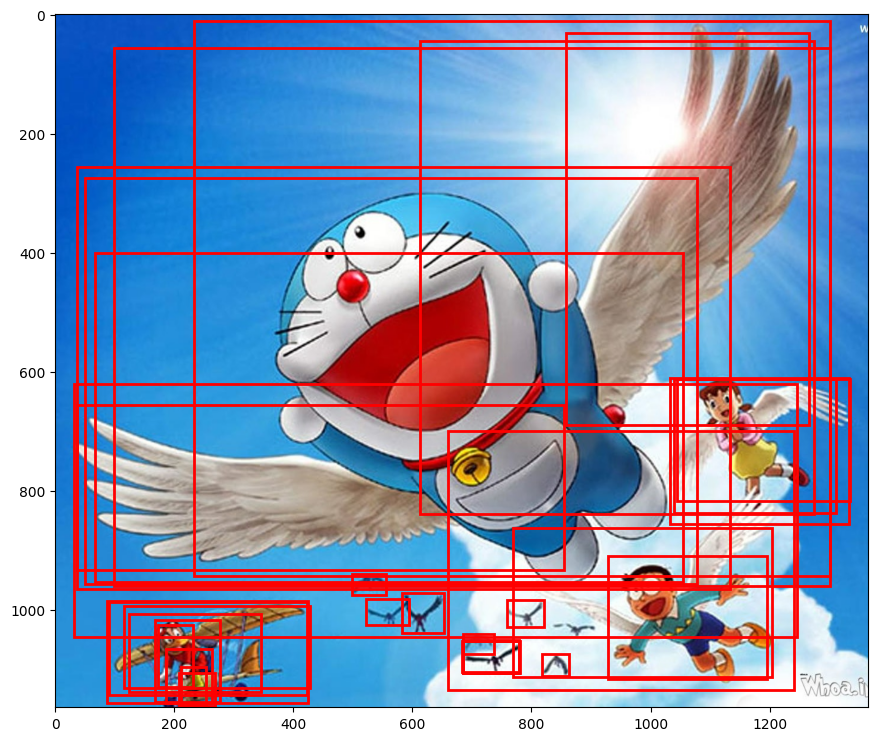

In [8]:
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torchvision.transforms as T

# Load a pre-trained model
weights = torchvision.models.detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=weights)
model.eval()

# Define image transformations
transform = T.Compose([
    T.ToTensor()
])

# Load and preprocess the image
img_path = "/content/8-81607_download-data-src-doraemon-3d-wallpaper-2018-for.jpg"  # Replace with your image path
img = Image.open(img_path)
img_t = transform(img)

# Perform inference
with torch.no_grad():
    prediction = model([img_t])

# Visualize the results
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(img)

for element in prediction[0]['boxes']:
    rect = patches.Rectangle((element[0], element[1]), element[2]-element[0], element[3]-element[1], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()


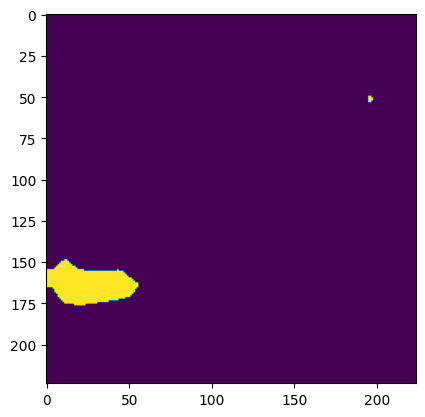

In [9]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T
import torchvision.models as models

# Load a pre-trained model
weights = models.segmentation.DeepLabV3_ResNet50_Weights.DEFAULT
model = models.segmentation.deeplabv3_resnet50(weights=weights)
model.eval()

# Define image transformations
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
img_path =  "/content/8-81607_download-data-src-doraemon-3d-wallpaper-2018-for.jpg" # Replace with your image path
img = Image.open(img_path)
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

# Perform inference
with torch.no_grad():
    output = model(batch_t)['out'][0]

# Get the segmentation map
output_predictions = output.argmax(0)

# Visualize the results
plt.imshow(output_predictions.cpu().numpy())
plt.show()
